<a href="https://colab.research.google.com/github/hamed-ai/NLP/blob/main/Natural%20Language%20Processing%20Real-World%20Projects%20in%20Python%20(Udemy)/Predict_the_Sentiments_of_Amazon_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Datasets/NLP Udemy/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [5]:
df['Helpfulness%']  = np.where(df.HelpfulnessDenominator>0, df.HelpfulnessNumerator/df.HelpfulnessDenominator, -1)

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [6]:
df['Helpfulness%'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [7]:
df['%upvote'] = pd.cut(df['Helpfulness%'], bins=[-1,0,0.2,0.4,0.6,0.8,1], labels=['Empty','0-20%','20-40%','40-60%','60-80%','80-100%'])

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [8]:
df.groupby(['Score','%upvote']).agg('count')

Id  ProductId  UserId  ...  Summary    Text  Helpfulness%
Score %upvote                             ...                               
1     Empty      8060       8060    8060  ...     8060    8060          8060
      0-20%      2338       2338    2338  ...     2338    2338          2338
      20-40%     4649       4649    4649  ...     4649    4649          4649
      40-60%     6586       6586    6586  ...     6586    6586          6586
      60-80%     5838       5838    5838  ...     5838    5838          5838
      80-100%   12531      12531   12531  ...    12531   12531         12531
2     Empty      4234       4234    4234  ...     4234    4234          4234
      0-20%       762        762     762  ...      737     762           762
      20-40%     1618       1618    1618  ...     1618    1618          1618
      40-60%     3051       3051    3051  ...     3051    3051          3051
      60-80%     2486       2486    2486  ...     2486    2486          2486
      80-100%    7014       7014    7014  ...     7014    7014          7014
3     Empty      5062       5062    5062  ...     5062    5062          5062
      0-20%       474        474     474  ...      474     474           474
      20-40%     1506       1506    1506  ...     1506    1506          1506
      40-60%     3384       3384    3384  ...     3384    3384          3384
      60-80%     2754       2754    2754  ...     2754    2754          2754
      80-100%   11037      11037   11037  ...    11036   11037         11037
4     Empty      4780       4780    4780  ...     4780    4780          4780
      0-20%       116        116     116  ...      116     116           116
      20-40%      909        909     909  ...      909     909           909
      40-60%     3185       3185    3185  ...     3185    3185          3185
      60-80%     2941       2941    2941  ...     2941    2941          2941
      80-100%   26707      26707   26707  ...    26707   26707         26707
5     Empty     11638      11638   11638  ...    11638   11638         11638
      0-20%       432        432     432  ...      432     432           432
      20-40%     2275       2275    2275  ...     2275    2275          2275
      40-60%    10312      10312   10312  ...    10312   10312         10312
      60-80%    11060      11060   11060  ...    11060   11060         11060
      80-100%  140661     140661  140661  ...   140661  140661        140661

[30 rows x 10 columns]

In [9]:
df.groupby(['Score','%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty      5062
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [10]:
df_score = df.groupby(['Score','%upvote']).agg({'Id':'count'}).reset_index()

df_score

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [11]:
pivot = df_score.pivot(index=['%upvote'], columns=['Score'])
pivot

Id                            
Score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

In [12]:
import seaborn as sns

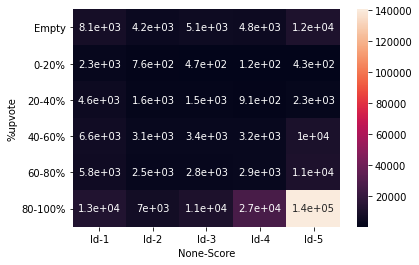

In [13]:
sns.heatmap(pivot, annot=True)

In [14]:
df['Score'].unique() 

array([5, 1, 4, 2, 3])

In [15]:
df2 = df[df['Score'] != 3]

In [16]:
df2['Score'].unique()

array([5, 1, 4, 2])

In [17]:
X = df2['Text']

In [18]:
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df2['Score'].map(y_dict)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
c = CountVectorizer(stop_words='english')

In [21]:
X_c = c.fit_transform(X)

In [22]:
X_c.shape

(525814, 114969)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_c, y)

In [25]:
X_train.shape

(394360, 114969)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_model = LogisticRegression()

In [28]:
LR_ML = log_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
LR_ML.score(X_test, y_test)

0.9362818932858643

In [30]:
w = c.get_feature_names()
w

['00',
 '000',
 '0000',
 '000001',
 '00001',
 '000013',
 '0000soo',
 '0001',
 '000111052',
 '0002251337',
 '0003',
 '0004',
 '000iu',
 '000kwh',
 '000mg',
 '000mi',
 '000s',
 '000su',
 '000usd',
 '000v',
 '001',
 '00100',
 '00127',
 '00128',
 '00129',
 '00130',
 '00131',
 '00132',
 '00134',
 '00136',
 '00139',
 '001bru',
 '002',
 '0020100604',
 '00202',
 '00227',
 '0023',
 '003',
 '004',
 '00493',
 '005',
 '00533',
 '0060187654',
 '0060721855',
 '0060928115',
 '0060959584',
 '0061658197',
 '006176793x',
 '0067575986',
 '0069615',
 '007',
 '00703',
 '00704',
 '0071468633',
 '0071477845',
 '0071486011',
 '0071499849',
 '008',
 '0099',
 '00a',
 '00am',
 '00b',
 '00gr',
 '00lb',
 '00m',
 '00pm',
 '00s',
 '00something',
 '00z',
 '01',
 '010',
 '0100',
 '01014',
 '01069',
 '011',
 '012',
 '013',
 '01317',
 '01318',
 '014',
 '0140444254',
 '0140446680',
 '0143114964',
 '014mg',
 '015',
 '017',
 '0174',
 '018',
 '0188',
 '019',
 '01915',
 '0199232768',
 '0199535892',
 '0199536066',
 '02',
 '02

In [31]:
coef = LR_ML.coef_.tolist()[0]
coef

[-0.19733352002488258,
 -0.016070886540486214,
 0.354262920653373,
 -0.0014284657744535489,
 0.0016056902591166898,
 0.0,
 0.0002788132272711862,
 -0.010865951987924793,
 0.0,
 0.0003095786312940936,
 0.0,
 -0.010452016793223324,
 0.0011112447755447098,
 0.014250172096357865,
 -0.3151674500439054,
 0.007113777773328293,
 0.0029192812151398327,
 0.003442579034718385,
 0.0005686072578320132,
 3.9562613476088626e-05,
 0.09595951842790403,
 0.029954039950678923,
 0.0383933516079043,
 0.0383933516079043,
 0.0383933516079043,
 0.0383933516079043,
 0.0383933516079043,
 0.0383933516079043,
 0.0383933516079043,
 0.0383933516079043,
 0.0383933516079043,
 -0.0002887238556473527,
 0.050700291720162535,
 0.0,
 -0.10835247922265462,
 -0.000506287033747584,
 0.00013243579047407127,
 0.0031233880045379685,
 0.04173858483514839,
 2.055496289592256e-05,
 0.0,
 0.0,
 8.271445618854895e-05,
 0.0062067822836254175,
 -0.05483873782169874,
 7.804312519977919e-05,
 0.012149813078892124,
 3.3317220218259094e-0

In [32]:
coef_df = pd.DataFrame({'word':w, 'Coefficient':coef})
coef_df

,word,Coefficient
0,00,-0.197334
1,000,-0.016071
2,0000,0.354263
3,000001,-0.001428
4,00001,0.001606
...,...,...
114964,çaykur,0.000000
114965,çelem,-0.138692
114966,être,0.018492
114967,île,0.014208


In [33]:
coef_df = coef_df.sort_values(['Coefficient','word'], ascending=False)
coef_df.head(20)

,word,Coefficient
80600,pleasantly,4.161488
5865,addicting,3.012584
39072,downside,2.864194
94667,skeptical,2.676542
113138,worries,2.498312
55029,hooked,2.463623
39214,drawback,2.441337
35726,delish,2.339689
111520,welcome,2.213147
35691,delighted,2.189965


In [34]:
#The top 10 negative words
coef_df.tail(10)

,word,Coefficient
65064,lousy,-2.724102
106852,unacceptable,-2.731388
88945,ripoff,-2.841921
67898,mediocre,-2.893656
24949,cancelled,-2.912048
37560,disappointing,-3.031235
113164,worst,-3.110395
34989,deceptive,-3.216851
88351,returnable,-3.246819
107383,undrinkable,-3.725344


In [35]:
def text_fit(X, y, nlp_model, ml_model, show = 1):
  X_c = nlp_model.fit_transform(X)
  print('The number of features:{}'.format(X_c.shape[1]))

  X_train, X_test, y_train, y_test = train_test_split(X_c, y)
  ml = ml_model.fit(X_train, y_train)
  accuracy = ml.score(X_test, y_test)
  print('The model accuracy:{}'.format(accuracy))
  
  if show ==1:
    features = nlp_model.get_feature_names()
    coeffs = ml.coef_.tolist()[0]
    coeffs_features_df = pd.DataFrame({'word':features,'Coefficient':coeffs})
    coeffs_features_df = coeffs_features_df.sort_values(['Coefficient','word'], ascending = False)

    print('Top 10 Positive words:')
    print(coeffs_features_df.head(10))
    print('\nTop 10 Negative words:')
    print(coeffs_features_df.tail(10))

In [36]:
text_fit(X, y, CountVectorizer(stop_words='english'), LogisticRegression())

The number of features:114969


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The model accuracy:0.9338780105588267
Top 10 Positive words:
              word  Coefficient
80600   pleasantly     3.905347
39072     downside     2.721480
94667    skeptical     2.446185
5865     addicting     2.390032
113138     worries     2.204251
87967       resist     2.179900
35726       delish     2.098525
55029       hooked     2.083398
96353     soothing     2.071805
43222    excellent     2.068712

Top 10 Negative words:
                 word  Coefficient
62401          lacked    -2.287819
41118     embarrassed    -2.438612
88945          ripoff    -2.524132
67898        mediocre    -2.570996
24949       cancelled    -2.710632
106852   unacceptable    -2.926386
37560   disappointing    -2.983867
34989       deceptive    -3.097555
113164          worst    -3.149667
107383    undrinkable    -3.444171


In [37]:
from sklearn.metrics import confusion_matrix,  accuracy_score

def predict(X, y, nlp_model, ml_model):
  X_c = nlp_model.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_c, y)
  ml = ml_model.fit(X_train, y_train)

  predictions = ml.predict(X_test)
  cnf_matrix = confusion_matrix(predictions, y_test)
  print('Confusion matrix:{}\n'.format(cnf_matrix))

  acc_score = accuracy_score(predictions, y_test)
  print('Model accuracy:{}'.format(acc_score))

In [38]:
predict(X, y, CountVectorizer(stop_words='english'), LogisticRegression())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion matrix:[[ 14781   2722]
 [  5848 108103]]

Model accuracy:0.9348060918648349


In [39]:
from sklearn.dummy import DummyClassifier

In [40]:
text_fit(X, y, CountVectorizer(), DummyClassifier(), show=0)

The number of features:115282
The model accuracy:0.7357174372784396


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
text_fit(X, y, TfidfVectorizer(stop_words='english'), LogisticRegression(), 0)

The number of features:114969
The model accuracy:0.9350114869079678


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [43]:
predict(X, y, CountVectorizer(stop_words='english'), LogisticRegression())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion matrix:[[ 14989   2881]
 [  5434 108150]]

Model accuracy:0.9367459339388684


Data Preparation for modelling purpose

In [44]:
df2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [45]:
df3 = df2[df2['Score']==5]
df3.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,-1.0,NaN
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,-1.0,NaN
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%


In [46]:
df3['%upvote'].unique()

['80-100%', NaN, '60-80%', 'Empty', '40-60%', '20-40%', '0-20%']
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [47]:
df3 = df3[df3['%upvote'].isin(['80-100%', '60-80%', '20-40%', '0-20%'])]
df3.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0,80-100%
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than thei...",One of my boys needed to lose some weight and ...,1.0,80-100%
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,0.8,60-80%


In [48]:
X1 = df3['Text']

In [49]:
df3['%upvote'].unique()

['80-100%', '60-80%', '20-40%', '0-20%']
Categories (4, object): ['0-20%' < '20-40%' < '60-80%' < '80-100%']

In [50]:
y1_dict = {'80-100%':1 , '60-80%':1, '20-40%':0, '0-20%':0}
y1 = df3['%upvote'].map(y1_dict)

In [51]:
y1.value_counts()

1.0    151721
0.0      2707
Name: %upvote, dtype: int64

Applying Tehniques to Handle Imbalanced Data & CV

In [52]:
#We should install Tensorflow before the next step, If it has not yet been installed
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [53]:
TF = TfidfVectorizer(stop_words='english')
X1_c = TF.fit_transform(X1)

In [54]:
RS = RandomOverSampler()
X_train_res, y_train_res = RS.fit_sample(X1_c, y1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [55]:
X_train_res.shape

(303442, 67196)

In [56]:
y_train_res.shape

(303442,)

In order to count all different classes we can use the following module

In [57]:
from collections import Counter

In [58]:
print('Original Dataset shape:{}'.format(Counter(y1)))
print('Balanced Dataset shape:{}'.format(Counter(y_train_res)))

Original Dataset shape:Counter({1.0: 151721, 0.0: 2707})
Balanced Dataset shape:Counter({1.0: 151721, 0.0: 151721})


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
log_class = LogisticRegression()

In [61]:
10.0**np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [62]:
grid = {'C': 10.0**np.arange(-2,3), 'penalty':['l1','l2']}

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
clf = GridSearchCV(estimator=log_class, param_grid=grid, cv=5, n_jobs=-1, scoring='f1_macro')

In [66]:
clf.fit(X_train_res, y_train_res)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X1_c, y1)

In [68]:
pred1 = clf.predict(X_test)

In [69]:
confusion_matrix(y_test, pred1)

array([[  716,     0],
       [  703, 37188]])

In [70]:
accuracy_score(y_test, pred1)

0.9817908669412283